In [1]:
import pandas as pd
import time 
import json
from collections import Counter
import matplotlib.pyplot as plt
# for Mac
%matplotlib inline
%config InlineBackend.figure_format='retina'

In /home/martin/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/martin/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/martin/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/martin/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/martin/.local/lib/python3.6/site-packages/matplotlib/mpl-data/s

In [2]:
with open('abs_dict_pubag.json', 'r') as read_file:
    abstract_dict = json.load(read_file)

start_len = len(abstract_dict['id'])
keywords = "convolutional+neural+networks+wheat"
#put convolutional neural network. CNN stands for Cheyenne or aminés (chemistry) etc
response = requests.get("https://api.nal.usda.gov/pubag/rest/search/?query={}&per_page=100&api_key={}".format(keywords, API_KEY)).json()
totalpages = response["request"]["totalPages"]

for i in range (totalpages):
    response = requests.get("https://api.nal.usda.gov/pubag/rest/search/?query={}&page={}&per_page=100&api_key={}".format(keywords, i+1, API_KEY)).json()
    for j in range (len(response['resultList'])):
        abs_id = response['resultList'][j]['id']
        if abs_id not in abstract_dict['id']:
            try:
                abstract_dict['id'].append(abs_id)
                abstract_dict['titles'].append(response['resultList'][j]['title'])
                abstract_dict['abstracts'].append(response['resultList'][j]['abstract'])
                abstract_dict['authors'].append((response['resultList'][j]['author']))
                abstract_dict['keywords'].append((keywords))
                abstract_dict['subject'].append((response['resultList'][j]['subject']))
                abstract_dict['date'].append((response['resultList'][j]['date']))
                abstract_dict['sources'].append((response['resultList'][j]['journal']))
            except:
                print(abs_id, " didn't work")
end_len = len(abstract_dict['id'])

print("added {} abstracts".format(end_len-start_len))


with open('pubag_abs_dict.json', 'w+') as f:
    json.dump(abstract_dict, f) response = requests.get("https://api.nal.usda.gov/pubag/rest/search/?query=precision+agriculture&per_page=100&page=22&api_key={}".format(API_KEY)).json()

SyntaxError: invalid syntax (<ipython-input-2-b3cc83836eb5>, line 32)

In [2]:
with open('abs_dict_pubag.json', 'r') as read_file:
    abstract_dict = json.load(read_file)

abstract_df = pd.DataFrame.from_dict(abstract_dict)
abstract_df.head()

,titles,abstracts,authors,keywords,sources,dates
0,Examining the social and biophysical determina...,Precision agricultural technologies (PA) such ...,"[Gardezi, Maaz, Bronson, Kelly]","[corn, farmers, financial economics, food prod...",Precision agriculture,2020
1,Wireless Sensor Network Synchronization for Pr...,The advent of Internet of Things has propelled...,"[Zervopoulos, Alexandros, Tsipis, Athanasios, ...","[Olea europaea, decision making, environmental...",Agriculture (Basel),2020
2,Smartphone Applications Targeting Precision Ag...,Traditionally farmers have used their perceptu...,"[Mendes, Jorge, Pinho, Tatiana M., Neves dos ...","[cost effectiveness, crops, farmers, humans, m...",Agronomy,2020
3,Controlled release micronutrient fertilizers f...,The rapid growth of the global population and ...,"[Mikula, Katarzyna, Izydorczyk, Grzegorz, Skrz...","[coatings, farmers, food safety, groundwater, ...",The Science of the total environment,2020
4,Farm adoption of embodied knowledge and inform...,On-farm adoption of individual and groups of p...,"[Miller, N. J., Griffin, T. W., Ciampitti, I. ...","[farms, precision agriculture, probability, Ka...",Precision agriculture,2019


       titles_x  titles_y
dates                    
1995        1.0       0.0
1997        0.0       1.0
2003        0.0       2.0
2008        2.0       0.0
2009        2.0       0.0
2011        1.0       2.0
2012        1.0       0.0
2014        2.0       0.0
2015        2.0       1.0
2016        1.0       7.0
2017        2.0       3.0
2018        3.0       4.0
2019        4.0      13.0
2020        4.0       8.0


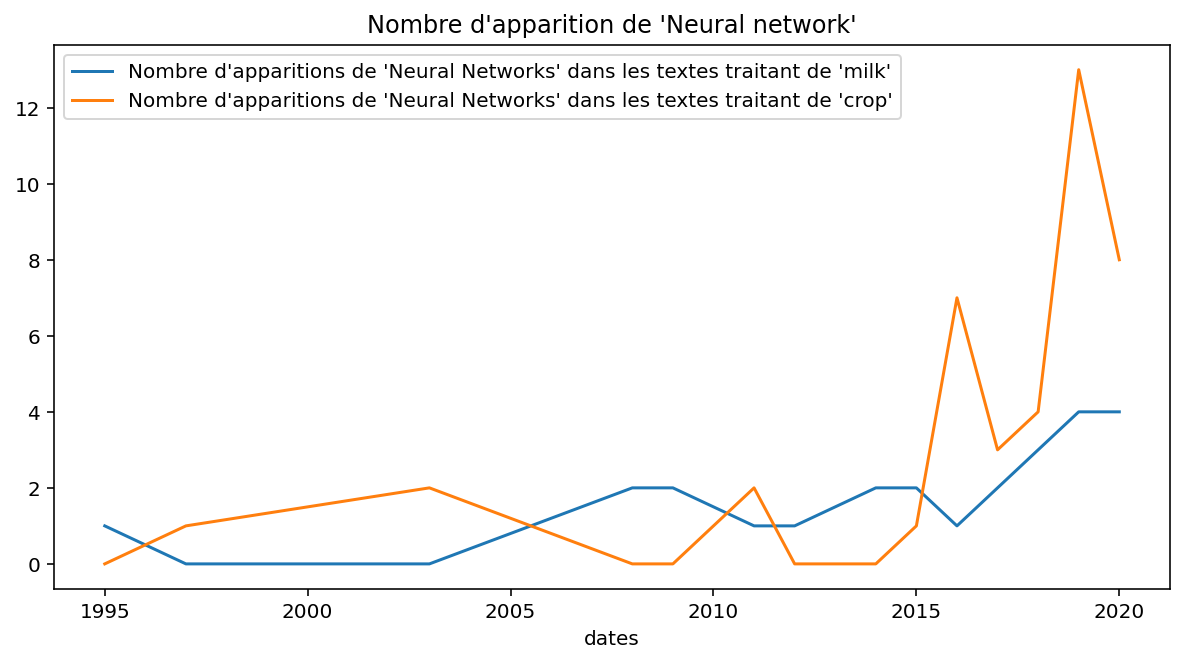

In [6]:
total_nbr_abstracts = abstract_df.shape[0]
keyword0 = "wheat"
keyword1 = "milk" 
keyword2 = "neural network"

def word_freq(keyword1, keyword2):
    max_date = 2021
    inter_df = abstract_df[abstract_df['abstracts'].str.contains(keyword1)]
    nbr_k1_abstracts = inter_df.shape[0]
    inter_df = inter_df[inter_df['abstracts'].str.contains(keyword2)]
    inter_df = inter_df.astype({'dates': 'int32'})
    inter_df = inter_df[(inter_df.dates > 1950) & (inter_df.dates <= max_date)]
    inter_df = inter_df.groupby('dates').count()
    inter_df = inter_df.drop(columns=["abstracts", "authors", "keywords", "sources"])
    return inter_df
#print(inter_df.head(15))

inter_df = word_freq(keyword1, keyword2)
k2_df = word_freq(keyword0, keyword2)
"""
# abstracts containing only k2
k2_df = abstract_df[abstract_df['abstracts'].str.contains(keyword2)]
k2_df = k2_df.astype({'dates': 'int32'}).groupby('dates').count()
k2_df = k2_df.drop(columns=["abstracts", "authors", "keywords", "sources"])
#print(k2_df.head(15))
"""
df = pd.merge(inter_df, k2_df, on="dates", how = "outer")
df = df.sort_values(by='dates')

df['titles_x'] = df['titles_x'].fillna(0)
df['titles_y'] = df['titles_y'].fillna(0)
print(df.head(35))
#df['titles_x'] = df['titles_x']/nbr_k1_abstracts
#df['titles_y'] = df['titles_y']/total_nbr_abstracts

df = df.rename(columns = {"titles_x": "Nombre d'apparitions de 'Neural Networks' dans les textes traitant de 'milk'", "titles_y": "Nombre d'apparitions de 'Neural Networks' dans les textes traitant de 'crop'"})


#print(x)
fig, ax = plt.subplots(1, 1,figsize=(10,5))
#dates = inter_df.groupby('dates').count().plot(ax=ax)
#print(dates)
dates = df.plot(ax=ax)

ax.legend()
plt.title("Nombre d'apparition de 'Neural network'")
plt.show()


In [ ]:
# ajouter fréquence d'apparition des mots dans les 